# Import the necessary libraries

In [2]:
import pandas as pd

# Assign the dataset into the variable named as data

In [3]:
data = pd.read_csv('Voice-Dataset.csv')

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Count the total no of male and female

In [5]:
data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

# Show the names of the c

In [6]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
def gender_converter(x):
    if(x == 'male'):
        return 0
    else:
        return 1

In [8]:
data['label'] = data['label'].apply(gender_converter)

In [9]:
data['label'].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set()

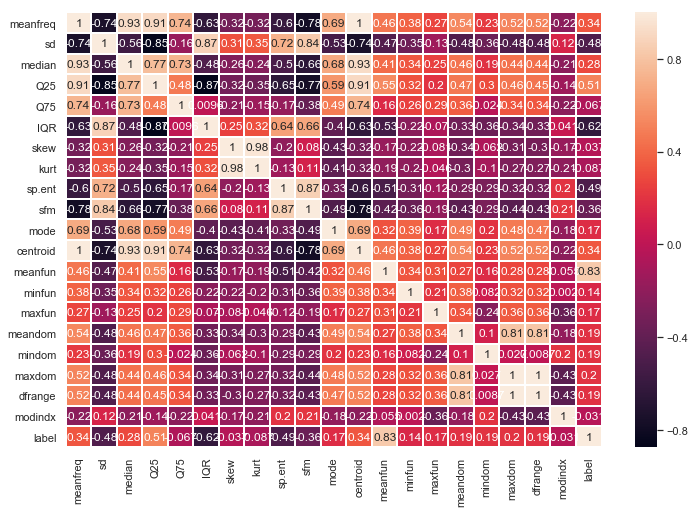

In [12]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(data.corr(), annot = True, linewidth = 1, linecolor = 'w')

In [13]:
training_data = data[['meanfun', 'Q25', 'IQR', 'sd', 'sp.ent']]

In [14]:
output_data = data['label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,
                                       test_size=0.3, random_state = 42)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
confusion_matrix(predictions, y_test)

array([[483,  68],
       [ 16, 384]], dtype=int64)

In [24]:
score = accuracy_score(predictions, y_test)

In [25]:
score

0.9116719242902208

In [26]:
## by default the value of neighbours is 5

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier()

In [29]:
knn_model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn_predictions = knn_model.predict(x_test)

In [31]:
knn_score = accuracy_score(knn_predictions, y_test)
knn_score

0.9768664563617245

In [32]:
from sklearn .model_selection import GridSearchCV

In [33]:
parameters = {'n_neighbors' : [5, 10, 15, 13]}

In [34]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = parameters)

In [35]:
grid_search.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
grid_search.best_params_

{'n_neighbors': 5}

In [37]:
grid_search.best_score_

0.9778980604420388

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt_model = DecisionTreeClassifier()

In [40]:
dt_model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
dt_predictions = dt_model.predict(x_test)

In [42]:
dt_score = accuracy_score(dt_predictions, y_test)
dt_score

0.961093585699264

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model = SVC()

In [45]:
svm_model.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
svm_predictions = svm_model.predict(x_test)

In [47]:
svm_score = accuracy_score(svm_predictions, y_test)
svm_score

0.9095688748685594

In [48]:
svm_parameters = {
    'C' : [0.01, 0.1, 1, 10, 100]
}

In [49]:
grid_search_svm = GridSearchCV(SVC(kernel = 'rbf'), param_grid = svm_parameters)

In [50]:
grid_search_svm.fit(X, Y)

F:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda Python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto'

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [51]:
grid_search_svm.best_params_

{'C': 100}

In [52]:
grid_search_svm.best_score_

0.9666215606675688